<a href="https://colab.research.google.com/github/dforsberg1/ML_01_Plotting/blob/main/Machine_Learning_Workshop_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research & Data Services

https://research.library.gsu.edu/dataservices

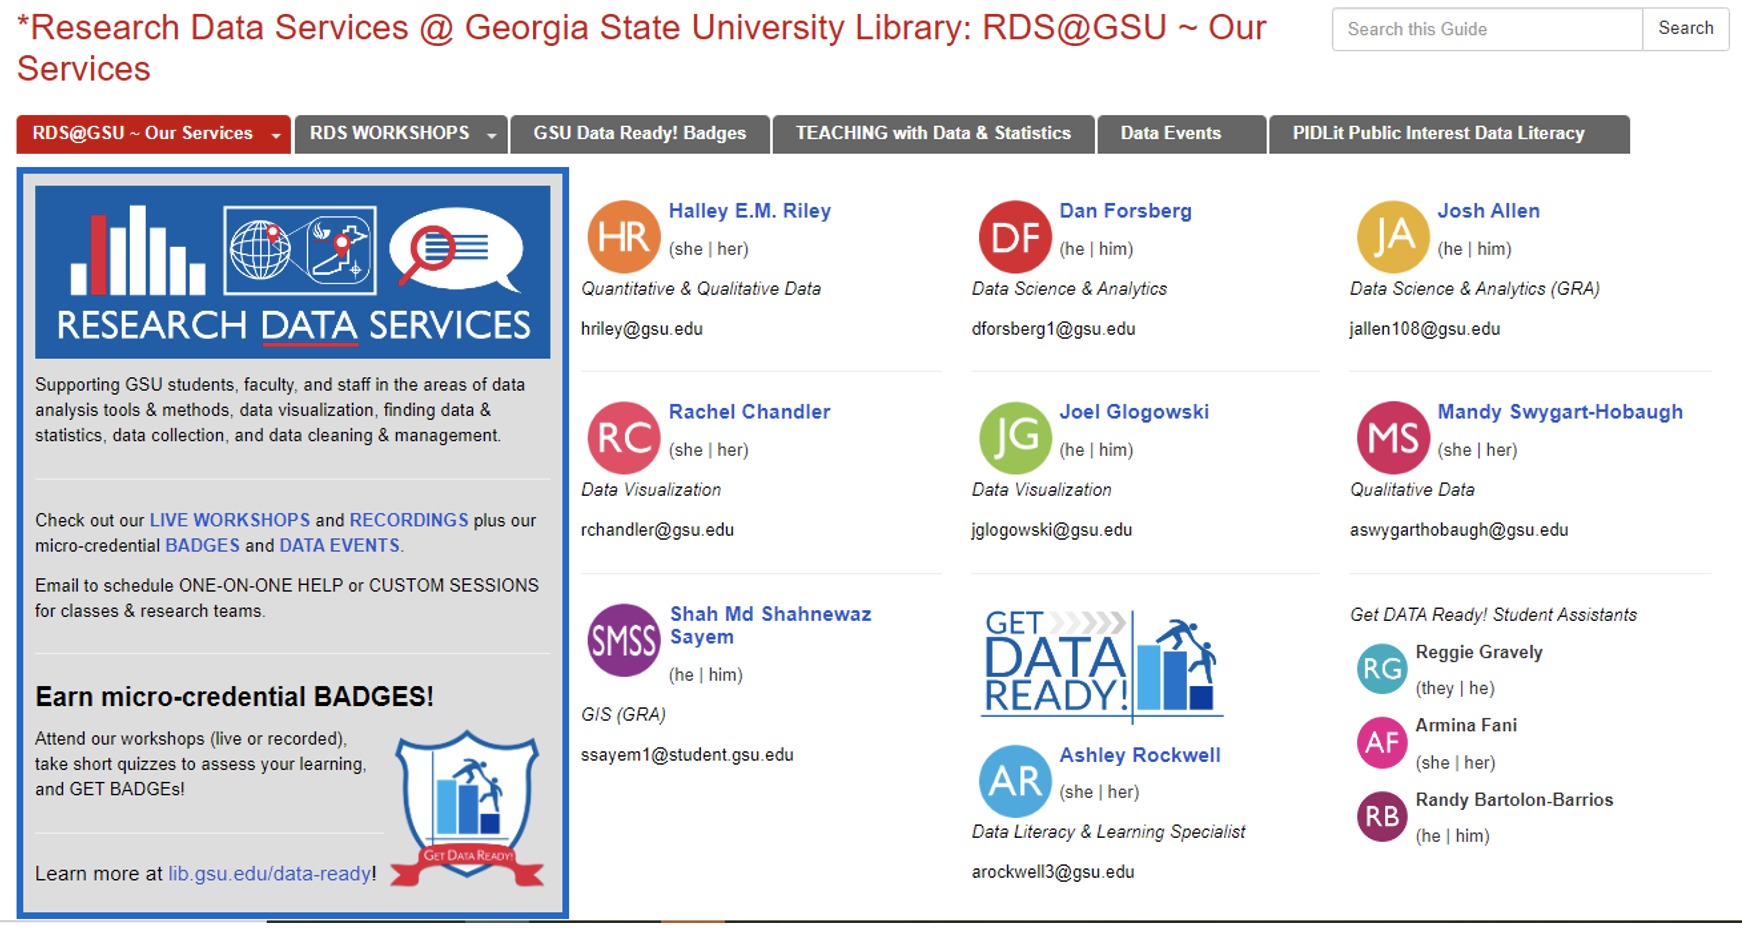

# RDS workshops:
https://research.library.gsu.edu/dataservices/rds-workshops

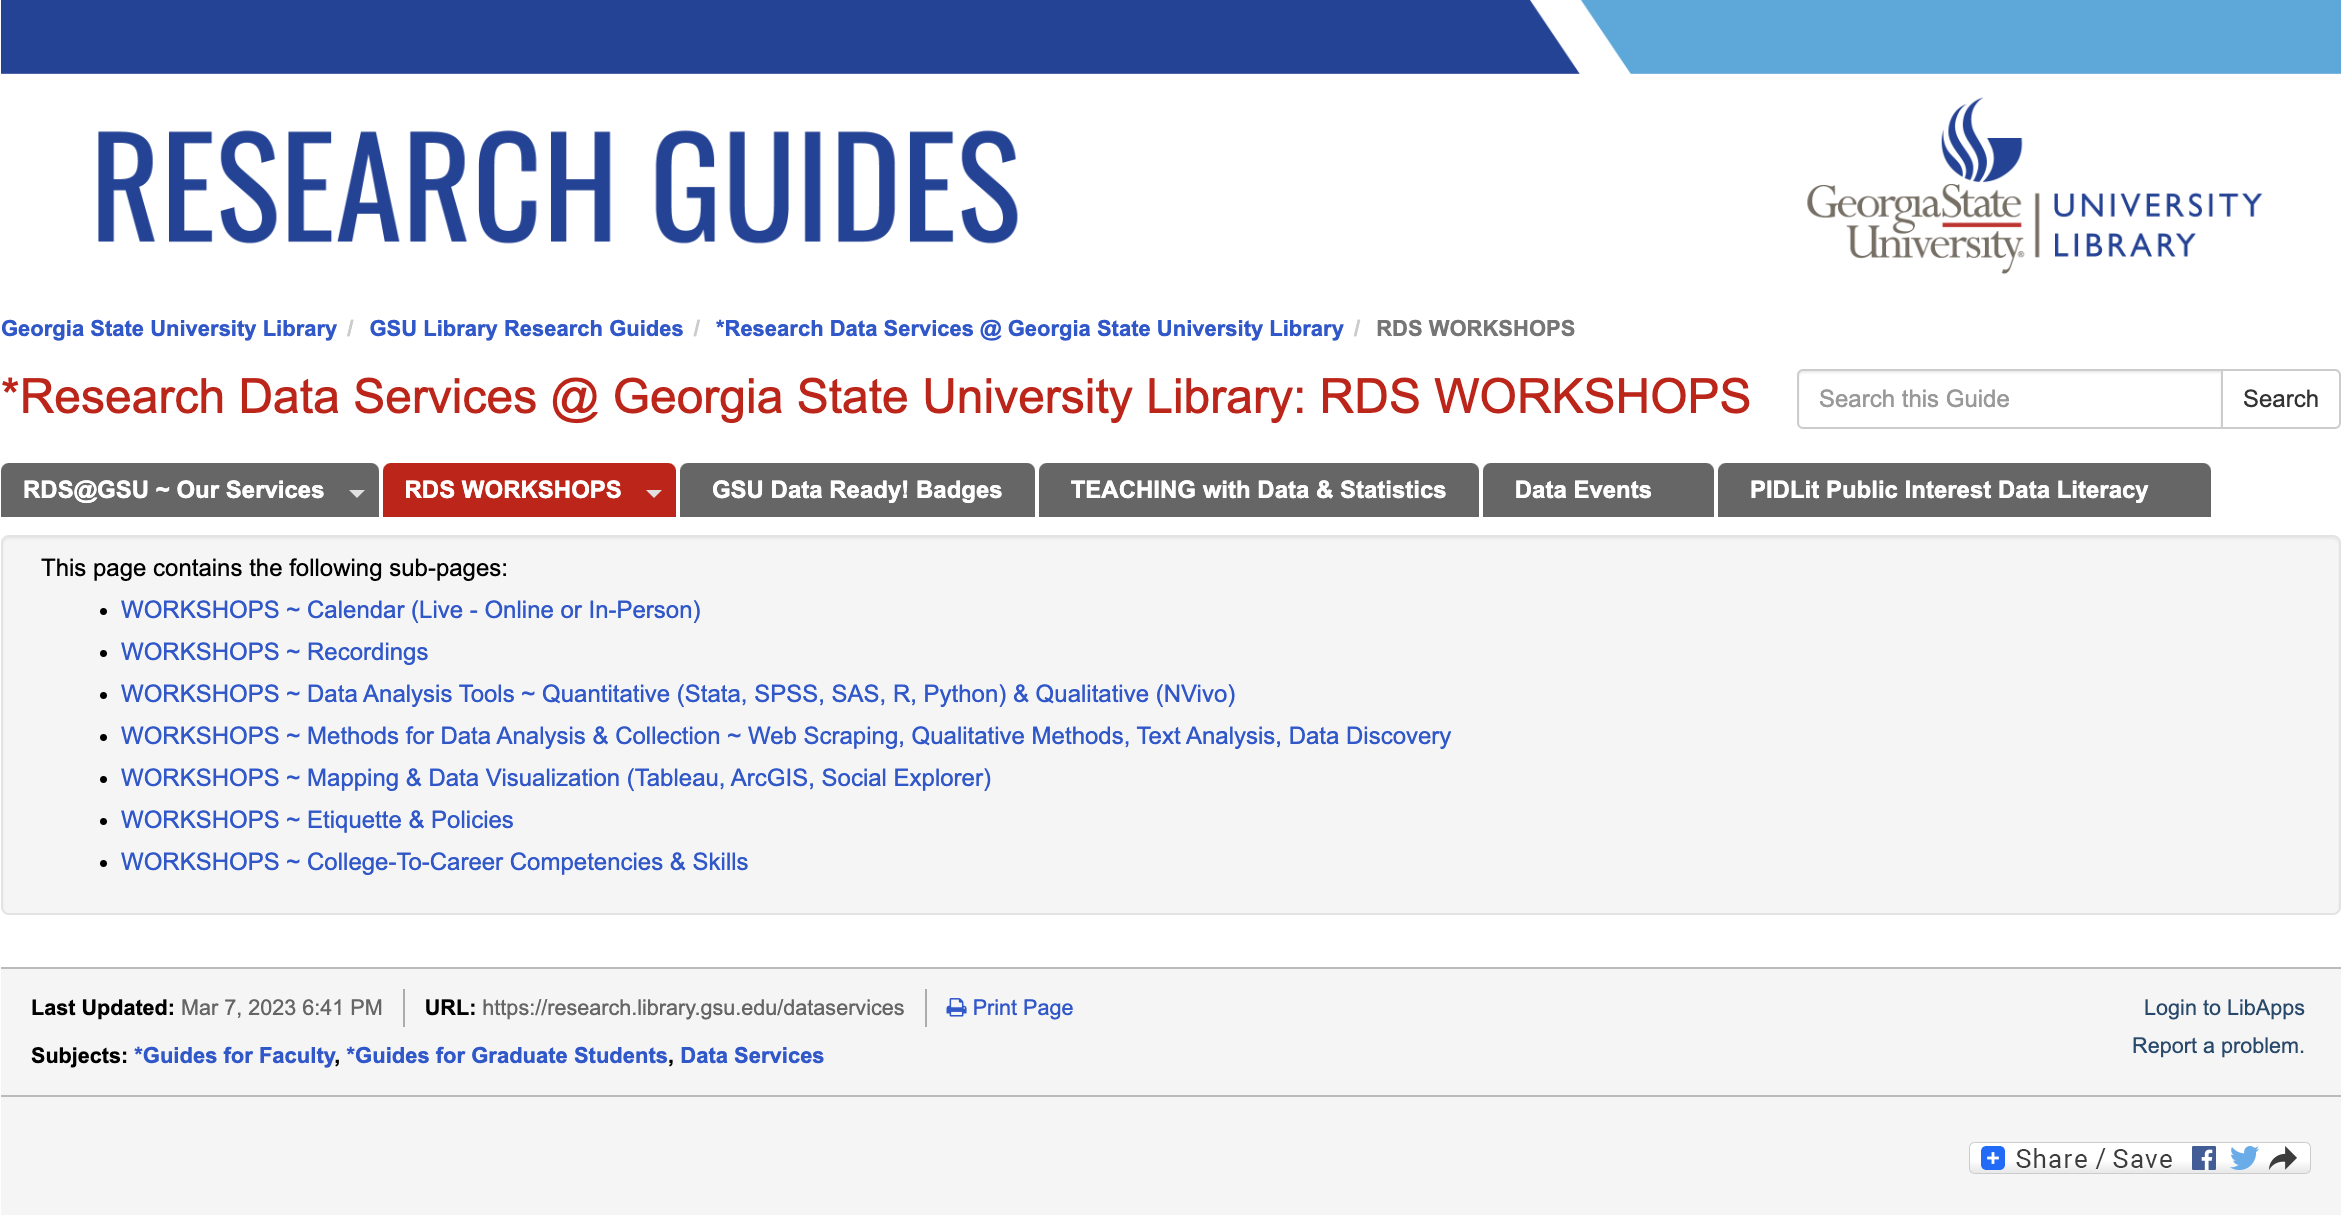

# Recorded RDS Workshops

https://research.library.gsu.edu/dataservices/rds-workshops-recordings

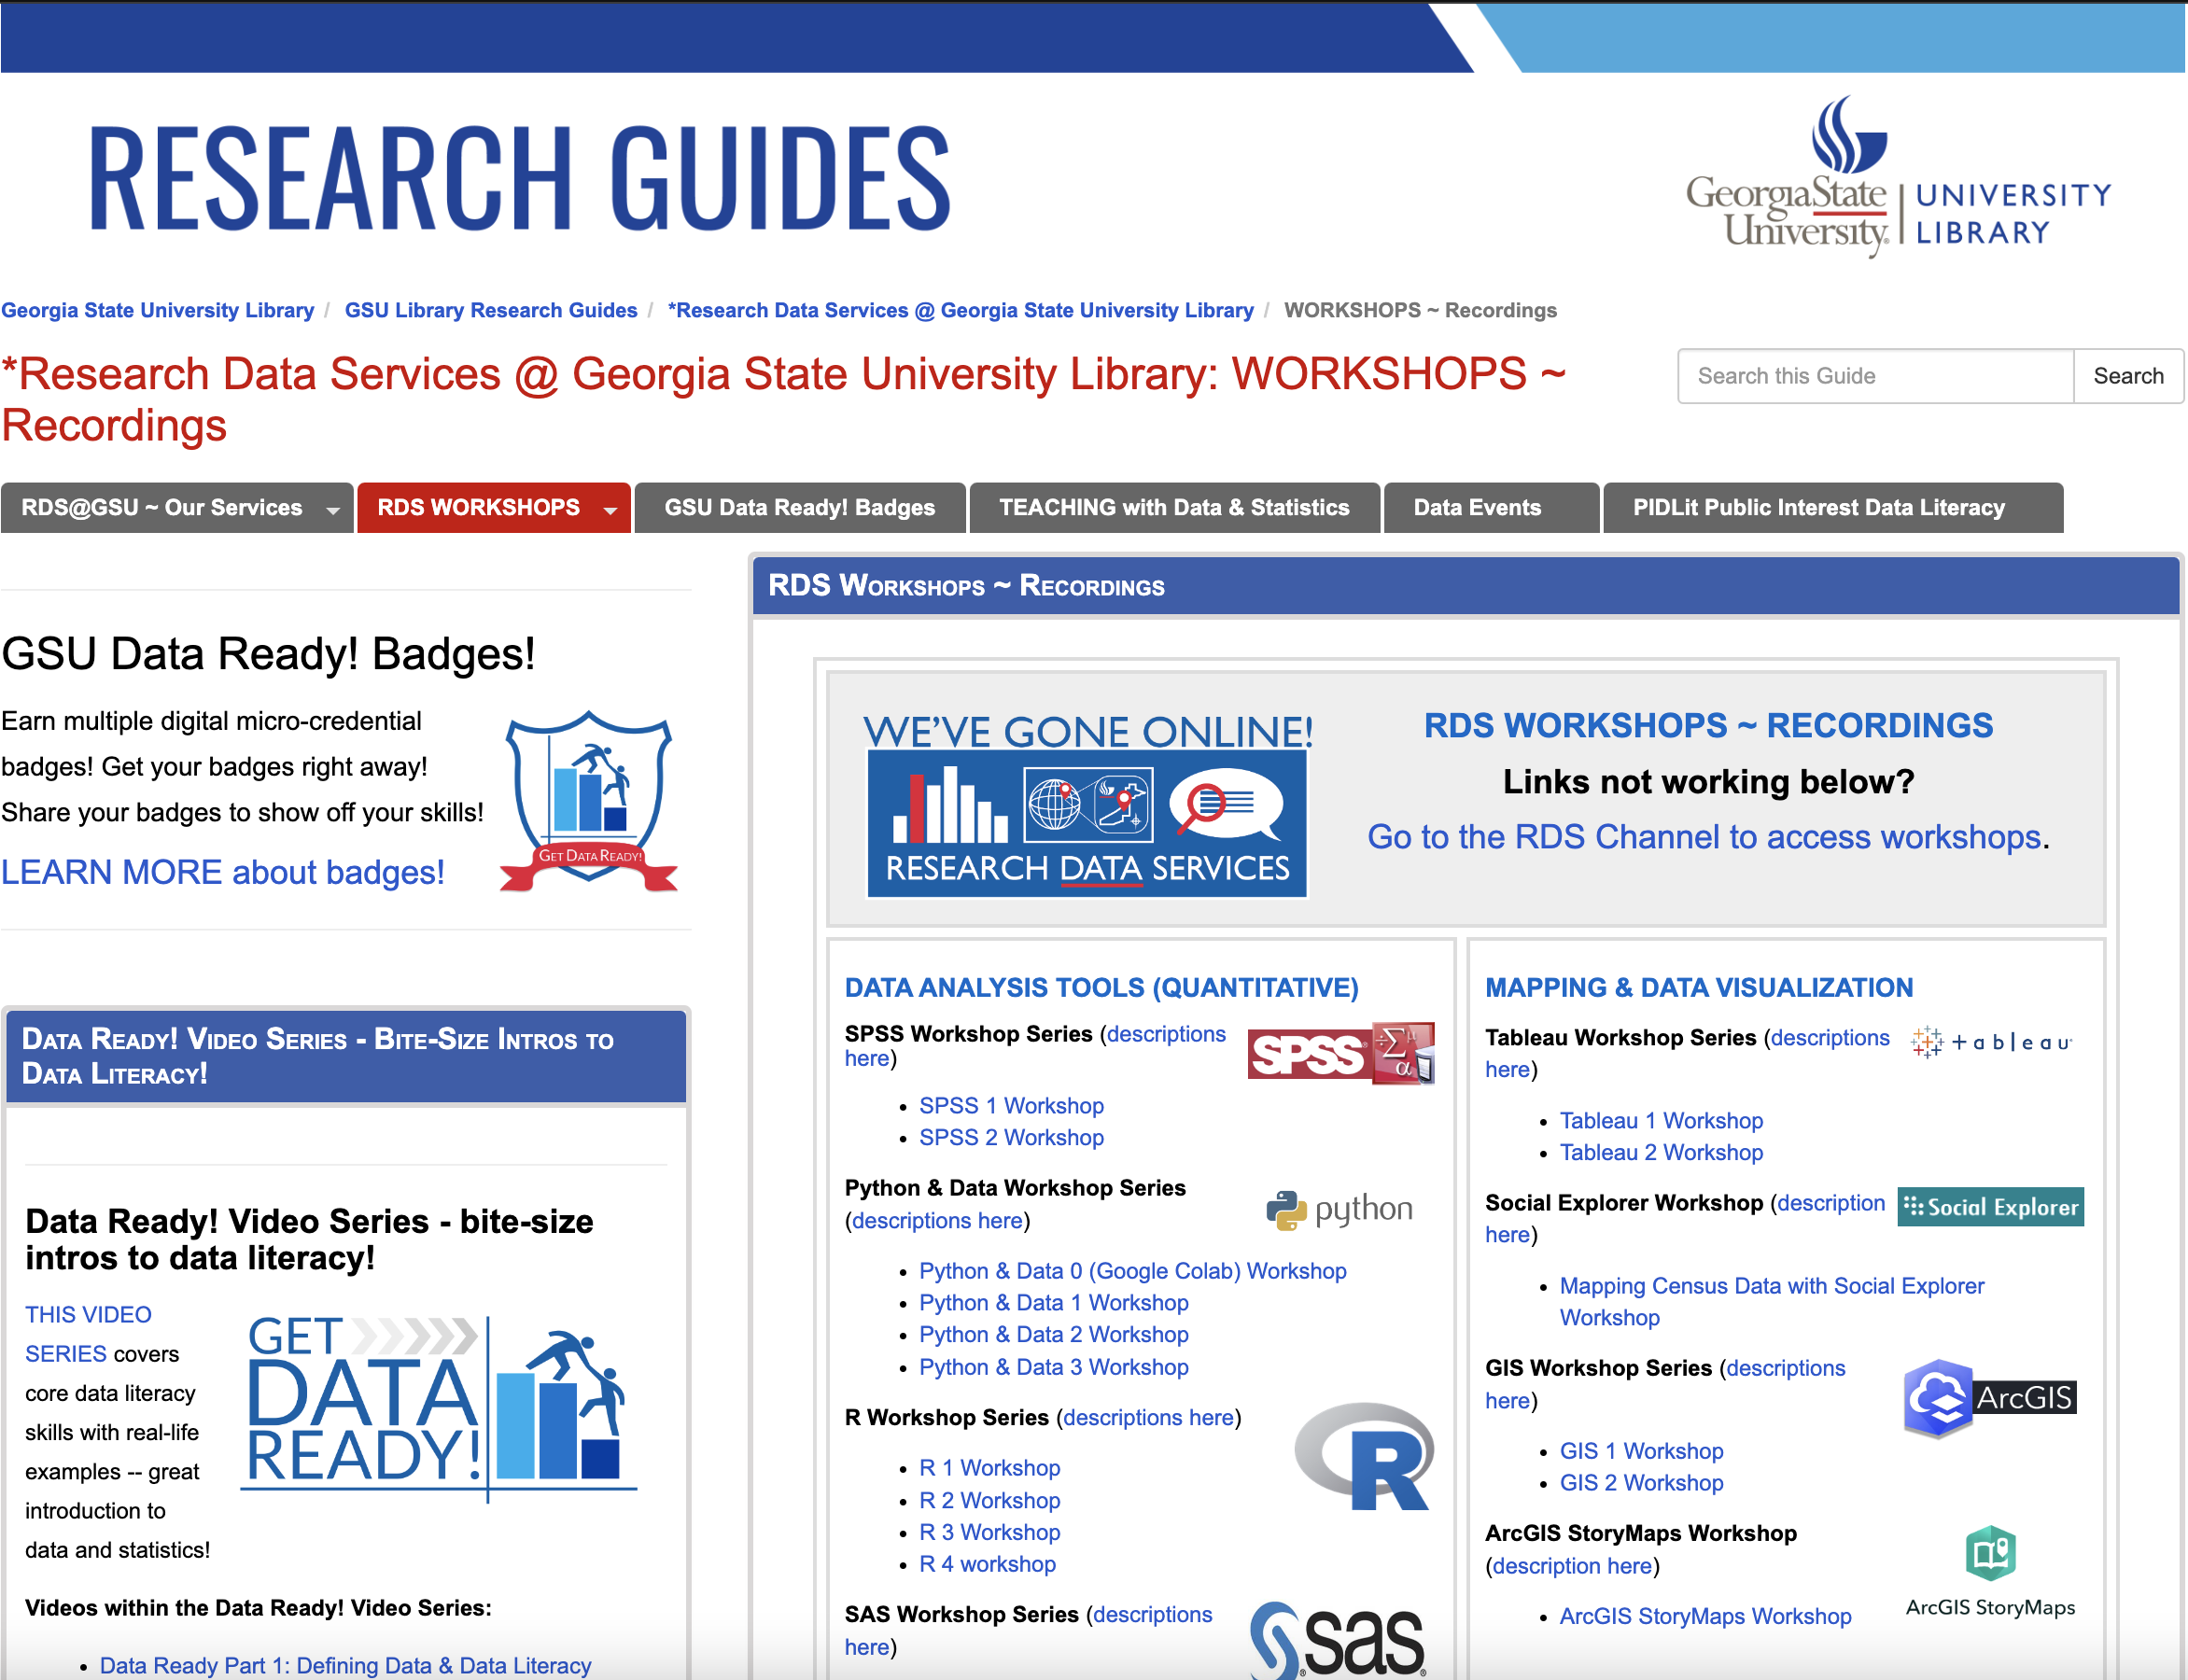

# Badge Program

https://research.library.gsu.edu/dataservices/data-ready

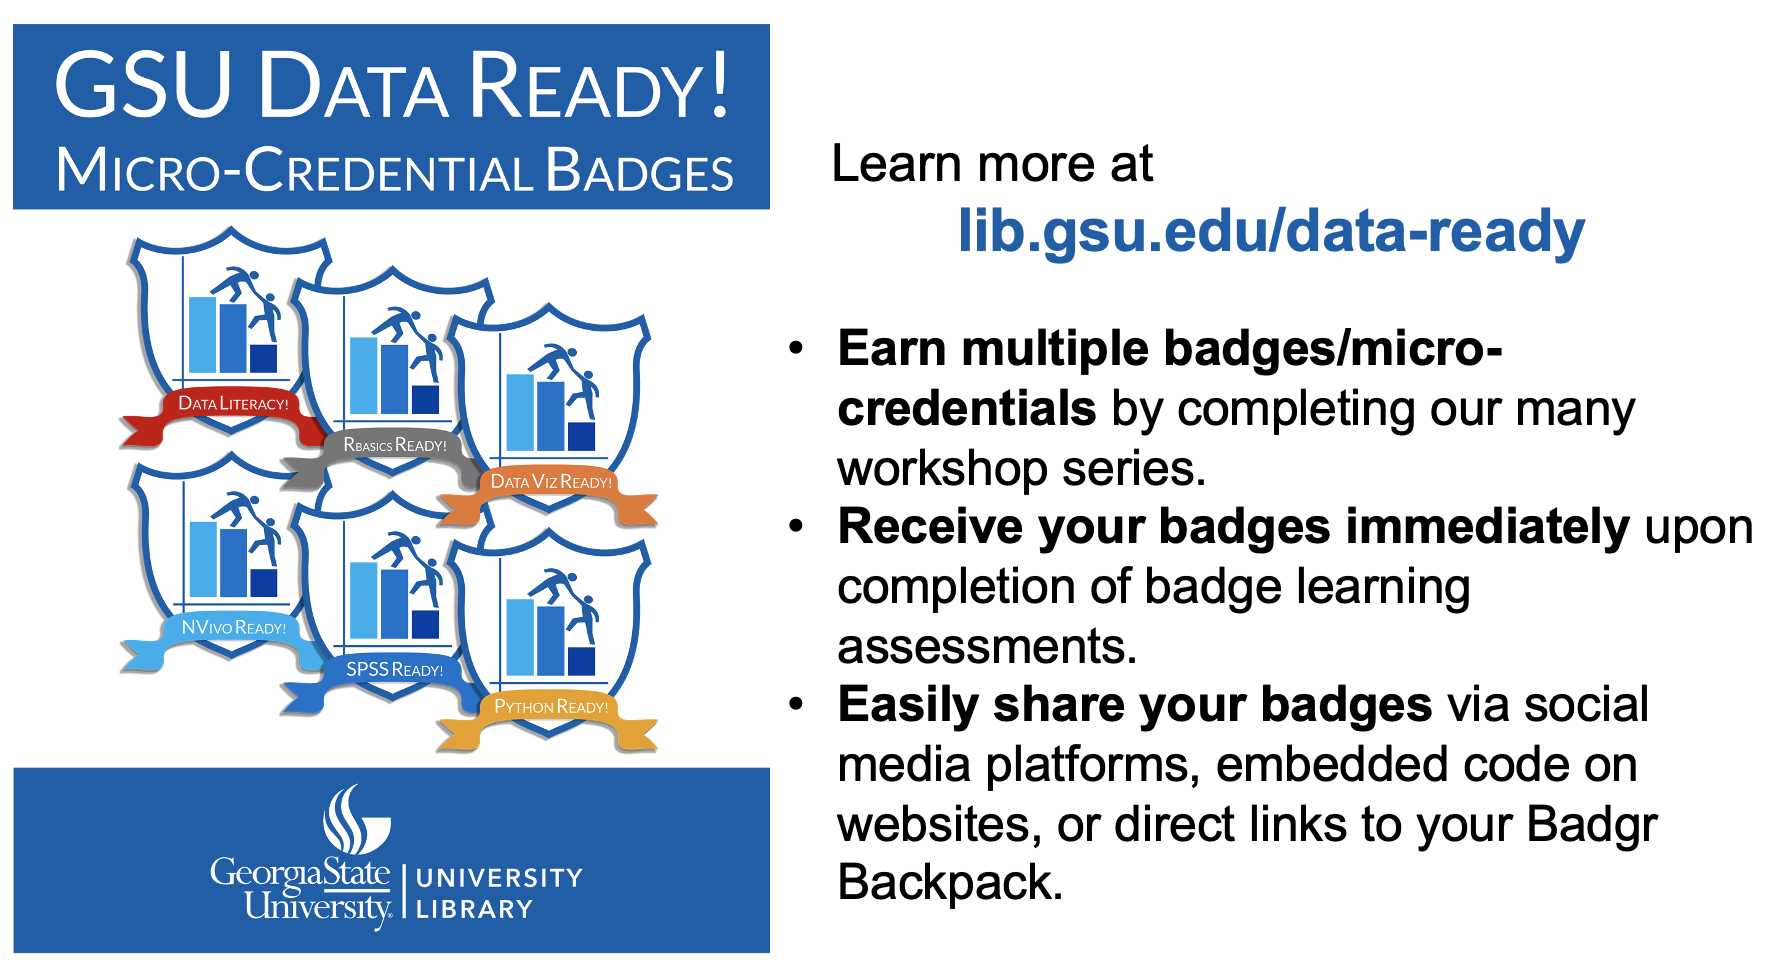

# Stacks

https://gsulibrary.catalog.instructure.com/

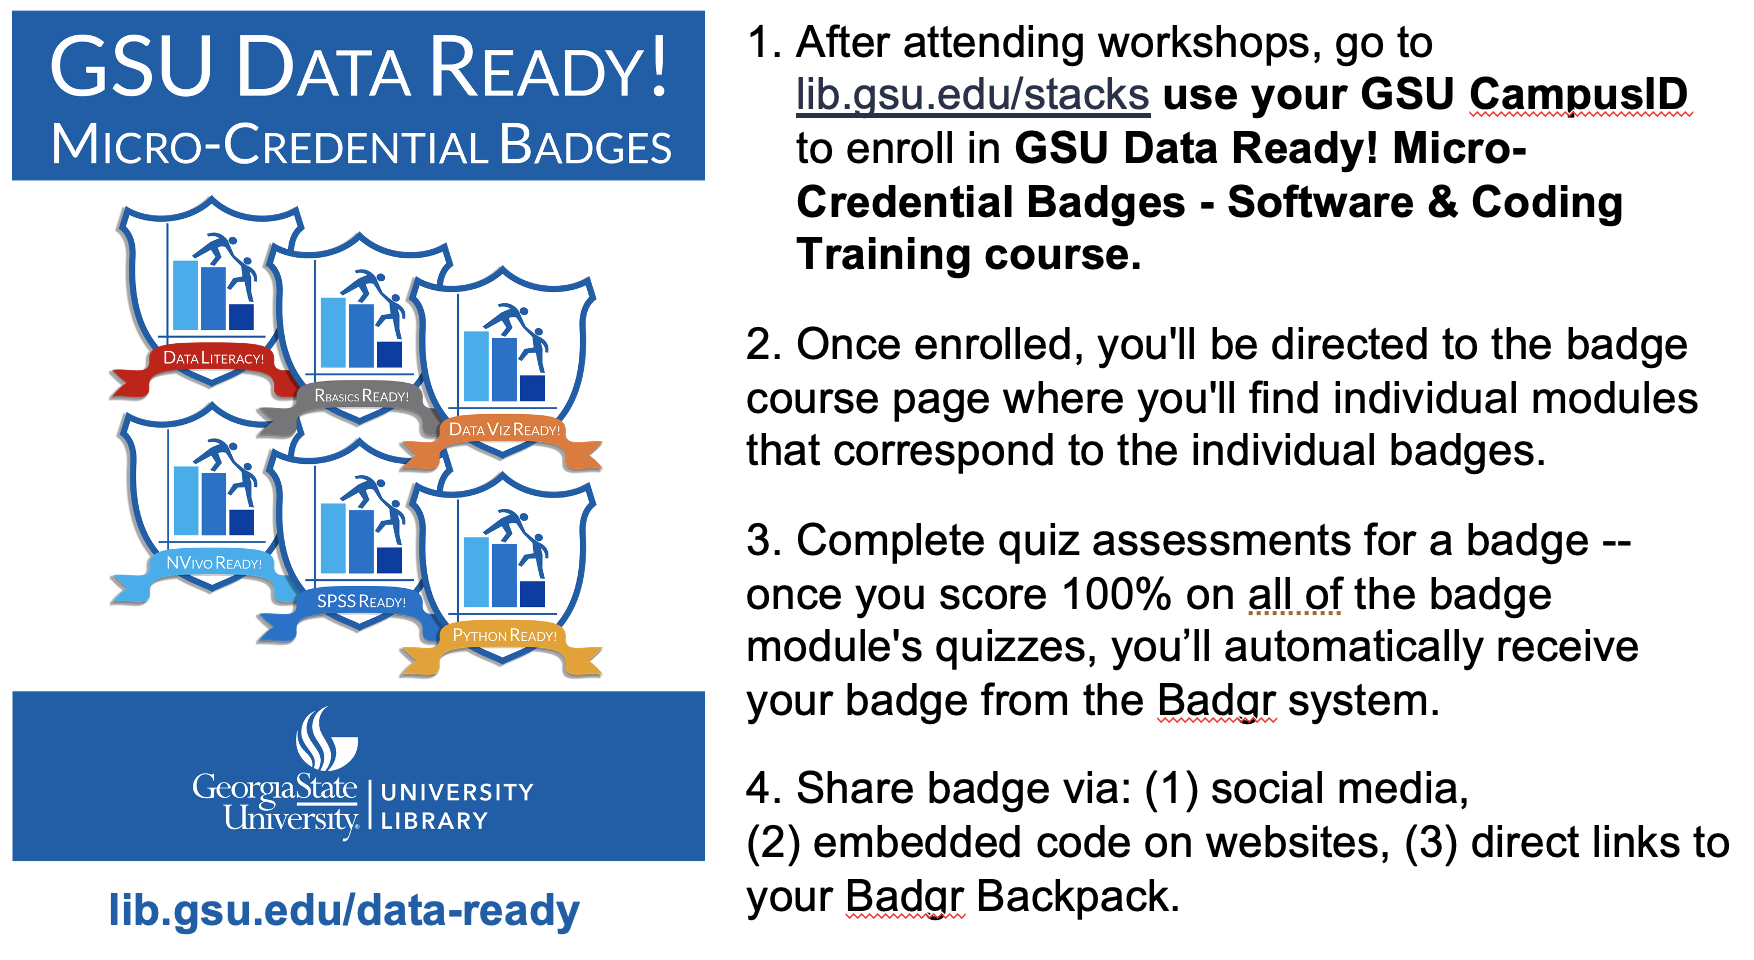

# **Machine Learning - Workshop 003**

**Lesson Plan:**

1.   Demonstrate the limitations of the regression algorithm on categorical data
2.   Cover Sigmoid Function
3.   Logistic Regression
4.   Logistic Loss Function
5.   Cost Function for Logistic Regression
6.   Gradient Descent for Logistic Regression
7.   Implementation in Python
8.   Additional Example(s)

Import necessary modules

In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors

Generate the data

In [ ]:
# Example data: Univariate
x_train = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

Plot a scatterplot of the data

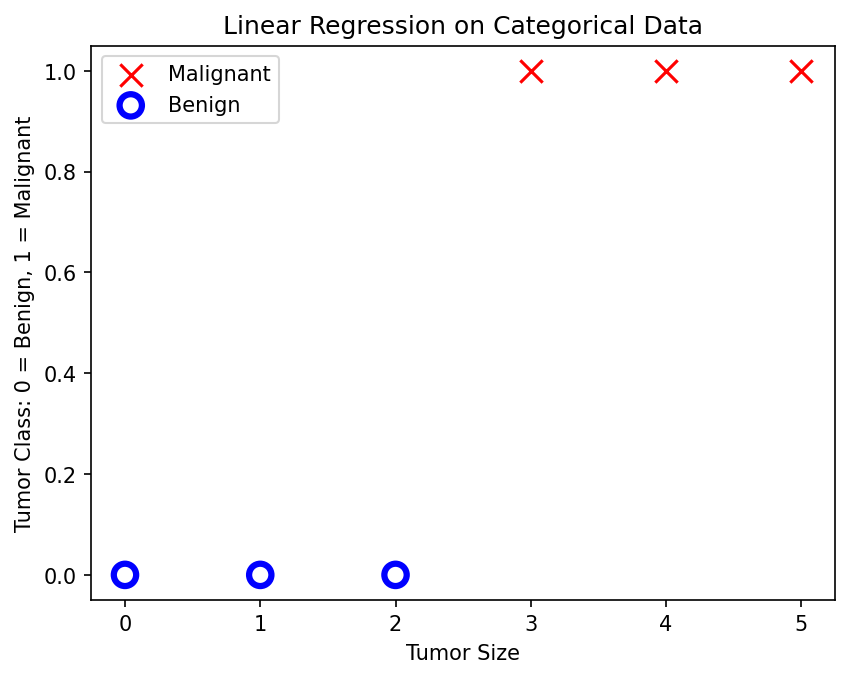

In [ ]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

Linear Regression approach
$$ $$
In the previous workshop, we applied linear regression to build a prediction model. Let's try an approach here using a simple example. The model will predict if a tumor is benign or malignant based on tumor size.

In [ ]:
# Linear Model
def linear_model_predict(x, b0, b1):
    """
    Computes the predictions of a linear model
    
    Args:
      x (ndarray (m,))   : Data, m examples 
      b0,b1 (scalars)    : model parameters  
    
    Returns
      y (ndarray (m,))   : predicted values
    """
    m = x.shape[0]
    f_b = np.zeros(m)
    for i in range(m):
        f_b[i] = b0 + b1 * x[i]
    return f_b

# Create a function that computes cost of model given training set & parameters
def compute_cost(x, y, b0, b1):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)) : Data, m examples 
      y (ndarray (m,)) : target values
      b0,b1 (scalars)  : model parameters  
    
    Returns
        total_cost (float): The cost of using b0,b1 as the parameters for
                            linear regression to fit the data points in x and y
    """
    m = x_train.shape[0] 
    cost = 0

    for i in range(m):
        f_b = b0 + (b1 * x[i])
        cost = cost + (f_b - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# Function to Compute Gradient Descent
def compute_gradient(x, y, b0, b1): 
    
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      b0,b1 (scalars): model parameters  
    Returns
      dj_db0 (scalar): The gradient of the cost w.r.t. the parameters b0
      dj_db1 (scalar): The gradient of the cost w.r.t. the parameter b1  
     """

    # Number of training examples
    m = x.shape[0]    
    dj_db0 = 0
    dj_db1 = 0

    for i in range(m):  
        f_b = b0 + (b1 * x[i])
        dj_db0_i = f_b - y[i] 
        dj_db1_i = (f_b - y[i]) * x[i] 
        dj_db0 += dj_db0_i
        dj_db1 += dj_db1_i 
    dj_db0 = dj_db0 / m
    dj_db1 = dj_db1 / m 
    
    return dj_db0, dj_db1

# Compute Gradient Descent
def gradient_descent(x, y, b0_in, b1_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit b0,b1. Updates b0,b1 by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      b0_in, b1_in (scalars): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      b0 (scalar): Updated value of intercept parameter after running gradient descent
      b1 (scalar): Updated value of slope parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [b0,b1] 
      """
   
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b0 = b0_in
    b1 = b1_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_db0, dj_db1 = gradient_function(x, y, b0, b1)     

        # Update Parameters using equation (3) above
        b0 = b0 - alpha * dj_db0                            
        b1 = b1 - alpha * dj_db1                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, b0, b1))
            p_history.append([b0,b1])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:5}: Cost {J_history[-1]:10.1f} ",
                  f"dj_db0: {dj_db0:9.1e}, dj_db1: {dj_db1:9.1e} ",
                  f"b0: {b0:9.2f}, b1:{b1:9.2f}")
 
    return b0, b1, J_history, p_history # return b1 and J, b1 history for graphing

In [ ]:
b0_tmp, b1_tmp, J_hist, p_hist = gradient_descent(x_train, y_train, 
                                                  0, 0, 0.1, 1000, 
                                                  compute_cost, compute_gradient)

Iteration     0: Cost        0.0  dj_db0:  -5.0e-01, dj_db1:  -2.0e+00  b0:      0.05, b1:     0.20
Iteration   100: Cost        0.0  dj_db0:   2.9e-03, dj_db1:  -8.3e-04  b0:     -0.13, b1:     0.25
Iteration   200: Cost        0.0  dj_db0:   1.5e-04, dj_db1:  -4.1e-05  b0:     -0.14, b1:     0.26
Iteration   300: Cost        0.0  dj_db0:   7.3e-06, dj_db1:  -2.1e-06  b0:     -0.14, b1:     0.26
Iteration   400: Cost        0.0  dj_db0:   3.6e-07, dj_db1:  -1.0e-07  b0:     -0.14, b1:     0.26
Iteration   500: Cost        0.0  dj_db0:   1.8e-08, dj_db1:  -5.1e-09  b0:     -0.14, b1:     0.26
Iteration   600: Cost        0.0  dj_db0:   9.0e-10, dj_db1:  -2.5e-10  b0:     -0.14, b1:     0.26
Iteration   700: Cost        0.0  dj_db0:   4.5e-11, dj_db1:  -1.3e-11  b0:     -0.14, b1:     0.26
Iteration   800: Cost        0.0  dj_db0:   2.2e-12, dj_db1:  -6.3e-13  b0:     -0.14, b1:     0.26
Iteration   900: Cost        0.0  dj_db0:   1.1e-13, dj_db1:  -3.2e-14  b0:     -0.14, b1:     0.26


In [ ]:
y_pred = linear_model_predict(x_train, b0_tmp, b1_tmp)

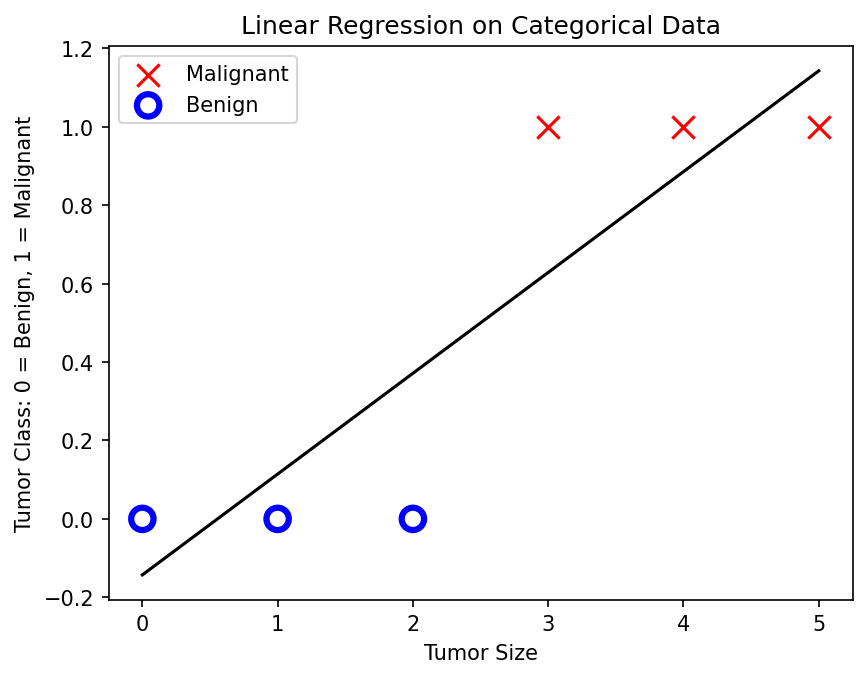

In [ ]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Plot our model predictions
plt.plot(x_train, y_pred, c='black')

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

We could set a threshold at $\widehat y$=0.5 such that:
$$ $$
\begin{equation}
\widehat y =
\left\{
    \begin{array}{lr}
        0, & \text{if } f_{\beta}(x) < 0.5\\
        1, & \text{if } f_{\beta}(x) \geq 0.5
    \end{array}
\right\}
\end{equation}
$$ $$

Create plot 

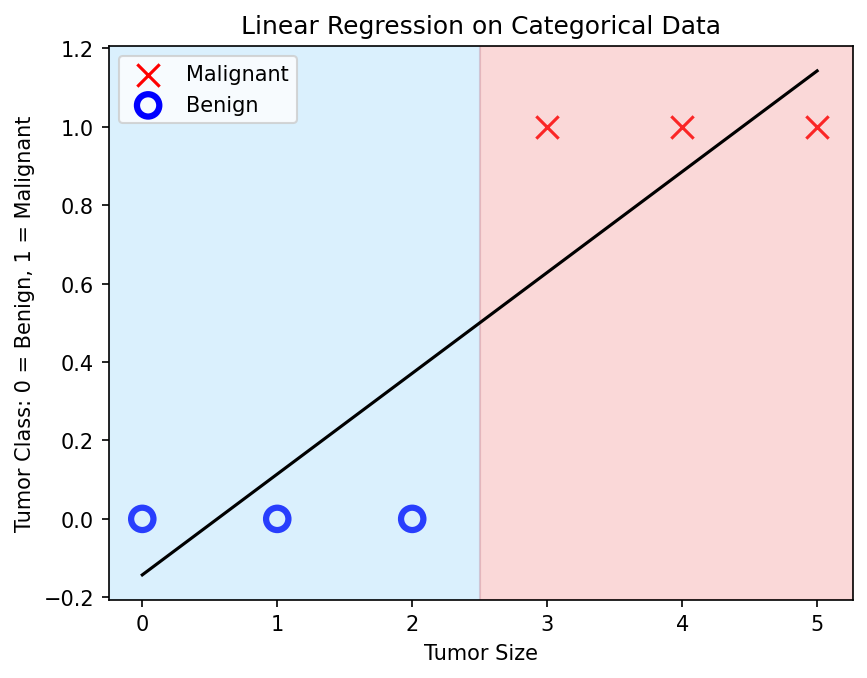

In [ ]:
# Identify Tumor Size where y-hat = 0.5
x_threshold = (0.5 - b0_tmp)/b1_tmp

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Plot our model predictions
plt.plot(x_train, y_pred, c='black')

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=x_threshold, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=x_threshold, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Remove horizontal white space
plt.margins(x=0)

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Add one new data point w/ large tumor size:
x_train = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 26.0])
y_train = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])

In [ ]:
# RE-RUN CODE ABOVE

# Gradient Descent
b0_tmp, b1_tmp, J_hist, p_hist = gradient_descent(x_train, y_train, 
                                                  0, 0, 0.001, 10000, 
                                                  compute_cost, compute_gradient)
# Linear Predictions
y_pred = linear_model_predict(x_train, b0_tmp, b1_tmp)

Iteration     0: Cost        0.3  dj_db0:  -5.7e-01, dj_db1:  -5.4e+00  b0:      0.00, b1:     0.01
Iteration  1000: Cost        0.1  dj_db0:  -1.4e-01, dj_db1:   7.6e-03  b0:      0.20, b1:     0.04
Iteration  2000: Cost        0.1  dj_db0:  -6.9e-02, dj_db1:   3.9e-03  b0:      0.29, b1:     0.04
Iteration  3000: Cost        0.1  dj_db0:  -3.5e-02, dj_db1:   2.0e-03  b0:      0.34, b1:     0.03
Iteration  4000: Cost        0.1  dj_db0:  -1.8e-02, dj_db1:   1.0e-03  b0:      0.37, b1:     0.03
Iteration  5000: Cost        0.1  dj_db0:  -9.3e-03, dj_db1:   5.2e-04  b0:      0.38, b1:     0.03
Iteration  6000: Cost        0.1  dj_db0:  -4.8e-03, dj_db1:   2.7e-04  b0:      0.39, b1:     0.03
Iteration  7000: Cost        0.1  dj_db0:  -2.4e-03, dj_db1:   1.4e-04  b0:      0.39, b1:     0.03
Iteration  8000: Cost        0.1  dj_db0:  -1.2e-03, dj_db1:   7.0e-05  b0:      0.40, b1:     0.03
Iteration  9000: Cost        0.1  dj_db0:  -6.4e-04, dj_db1:   3.6e-05  b0:      0.40, b1:     0.03


New Plot

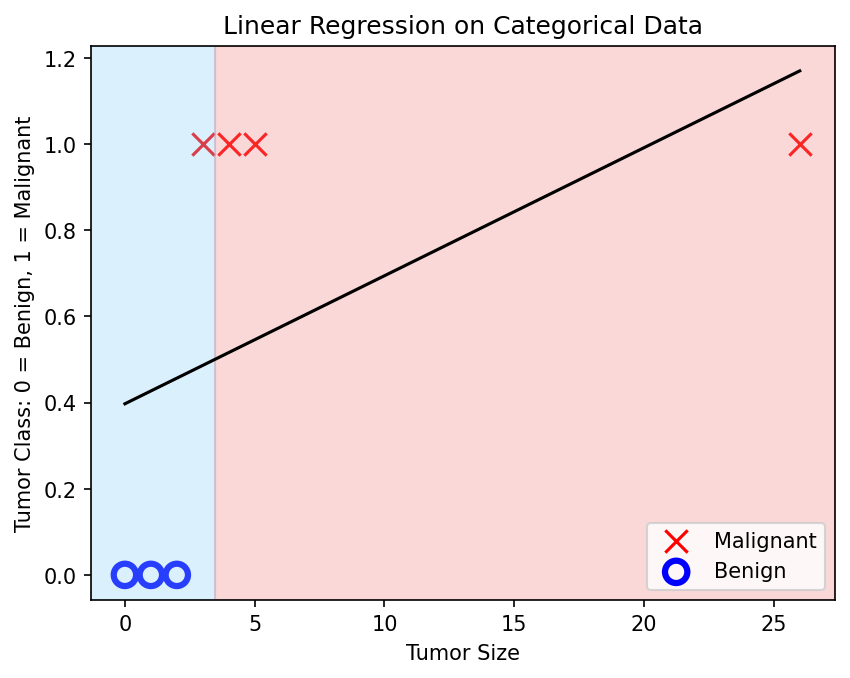

In [ ]:
# Identify Tumor Size where y-hat = 0.5
x_threshold = (0.5 - b0_tmp)/b1_tmp

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Plot our model predictions
plt.plot(x_train, y_pred, c='black')

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=x_threshold, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=x_threshold, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Remove horizontal white space
plt.margins(x=0)

# Show the legend
plt.legend()

# Display the plot
plt.show()

In both data sets, tumors with size > 3 are malignant. By including an additional training example where "tumor size = 26" and "tumor class = malignant", we see that the prediction where tumor size = 4 as changed as a result (Notice that this point is now misclassified). Additionally, we previously had to manually set a threshold at $\hat{y}$ = 0.5 (which looked like a good threshold after examining the initial plot). However, now that we have new data, the threshold is no longer a good one. Ultimately, we don't want to rely on a model where we have to manually set a threshold. Instead, this is a case where logistic regression would do a much better job than linear regression.

# Sigmoid Function

Prior to seeing logistic regression, we'll first need to learn about the "sigmoid function". Since we want a model that takes inputs and returns values between 0 and 1 consistent with our labels (i.e., tumor class takes on values of either 0 or 1). The sigmoid function is written as:
$$ $$
$$ g(z) = \frac{1}{1+e^{-z}} \tag{Eq. 3.1}$$
where:
- $ z = f_{\beta}(x) $
- $ e \approx 2.718 $
- $ 0 < g(z) < 1 $
$$ $$

Let's take a look at a plot of the sigmoid function:

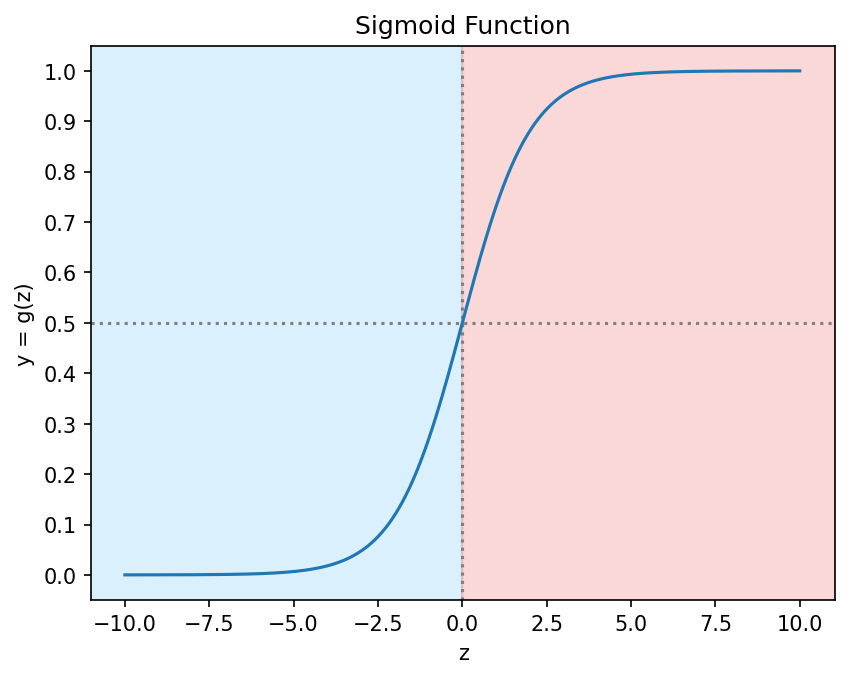

In [ ]:
# Create sigmoid function
def sigmoid(z):
  g = 1 / (1 + np.exp(-z))
  return g

# Establish x-axis range and calculate y values
z = np.linspace(-10, 10, 1000)
y = sigmoid(z)

# Plot sigmoid function
plt.plot(z, y, zorder = 3)

# Add dotted grey lines
plt.axhline(y=0.5, color='grey', linestyle = 'dotted')
plt.axvline(x=0.0, color='grey', linestyle = 'dotted')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=0, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=0, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Set the number of y ticks to 12
plt.gca().yaxis.set_major_locator(MaxNLocator(12)) # Sets the number of x-ticks

# Remove horizontal white space
plt.margins(x=0)

# Set lables and title
plt.xlabel('z')
plt.ylabel('y = g(z)')
plt.title('Sigmoid Function')

# Display the plot
plt.show()

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.

# Logistic Regression

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:
$$ $$
$$ \widehat y = g(z) = g(f_{\mathbf{\beta}}(\mathbf{X})) \tag{Eq. 3.2} $$ 

  where:
- $ g(z) = \frac{1}{1+e^{-z}} $
- $ X $ : feature matrix with m training examples and n+1 columns
- $ \vec{\beta} $ = $ [\beta_0, \beta_1, ..., \beta_n] $
$$ $$

The output of logistic regression is interpreted as:
$$ $$
$$ P(y = 1 | \textbf{X}; \vec{\beta}) \tag{Eq. 3.3} $$
$$ $$
- i.e., the probability that y = 1 given feature matrix, $\textbf{X}$,  and parameters, $\vec{\beta}$


Let's apply logistic regression using the previous example on tumor size:

In [ ]:
# Data set from before:
x_train = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 26.0])
y_train = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])

# Create a vector of 1's with length = # of training examples
x0 = np.ones(x_train.shape[0])

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, x_train))

# Create vector of parameters close to the optimal values (we'll cover how to find these later...)
b_logistic = np.array([-11.15, 4.54])

In [ ]:
print(X_train)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1. 26.]]


In [ ]:
print(x0)

[1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Create logistic prediction function:
def logistic_model_predict(X, b):
    """
    Computes the predictions of a logistic regression model
    
    Args:
      X (ndarray (m,n+1)) : Data, m examples, n+1 columns (n features + bias column of all 1's)
      b (ndarray (n+1,))  : model parameters (bias parameter + the feature parameters)
    
    Returns
      y (ndarray (m,))   : predicted values
    """
    m = X.shape[0]
    z = np.zeros(m)

    g = np.zeros(m)
    z = np.dot(X, b)

    g = 1 / (1 + np.exp(-z))
    
    return g

In [ ]:
y_logistic_pred = logistic_model_predict(X_train, b_logistic)

np.set_printoptions(suppress=True, precision=5)
print(y_logistic_pred)

[0.00001 0.00135 0.11205 0.92201 0.9991  0.99999 1.     ]


Plot the results:

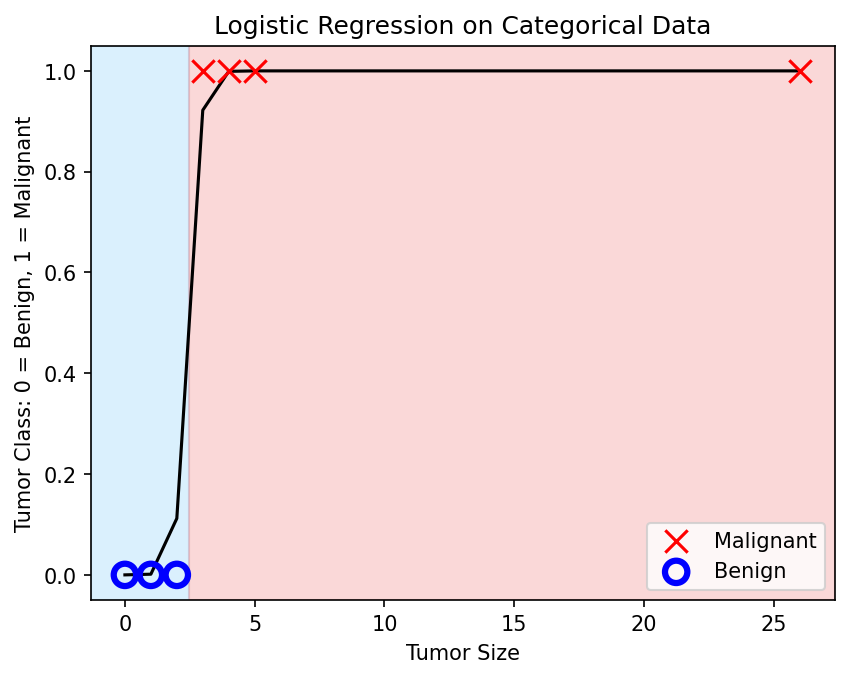

In [ ]:
# Identify Tumor Size where y-hat = 0.5
x_threshold = -b_logistic[0]/b_logistic[1]

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant", zorder = 3)
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue", lw=3, zorder = 3)

# Plot our model predictions
plt.plot(x_train, y_logistic_pred, c='black')

# Set the title
plt.title("Logistic Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=x_threshold, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=x_threshold, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Remove horizontal white space
plt.margins(x=0)

# Show the legend
plt.legend()

# Display the plot
plt.show()

Unlike the linear regression model, this model makes correct predictions even when the training example containing the large tumor size is included.
$$ $$
Now that we've seen how useful logistic regression can be in classification cases, let's examine the cost function and gradient descent algorithm specific to logistic regression.

# Logistic Loss Function


Recall for **Multiple Linear Regression** we have used the **squared error cost function** (MSE):
$$ $$
  $$J(\beta) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (f_{\beta}(x^{(i)}) - y^{(i)})^2  \tag{Eq. 3.4}$$ 
$$ $$
where:
$$ $$
$$f_{\beta}(x^{(i)}) = \beta_0 + \beta_1 x_1^{(i)} \ + \ ... \ + \ \beta_n x_n^{(i)} \tag{Eq. 3.5}$$
$$ $$

While the mean squared error cost function works well for linear regression (due to its convexity), the MSE cost function does not work well for logistic regression. Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.
Instead, the following cost function is used with logistic regression:
$$ $$

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. We will use the following definitions for loss and cost:
$$ $$
**Loss** is a measure of the difference of a single example to its target value. \
**Cost** is a measure of the losses over the entire training set.

The Logistic Loss function is defined as: 
$$ $$
$$ L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) $$
$$ $$
and is the cost for a single data point, which is:
$$ $$
\begin{equation}
  L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) & \text{if $y^{(i)}=1$}\\ \tag{Eq 3.6}
    - \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}
$$ $$

*  $f_{\mathbf{\beta}}(\mathbf{X}^{(i,)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}) = g(\mathbf{X^{(i,)}}\cdot\mathbf{\beta}^{(i)}) = g(\beta_0 \ + \ \beta_1 x_1^{(i)} \ + \ ... \ + \beta_n^{(i)}) $ where function $g$ is the sigmoid function.
$$ $$

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero, or ($y=0$), and another for when the target is one, or ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

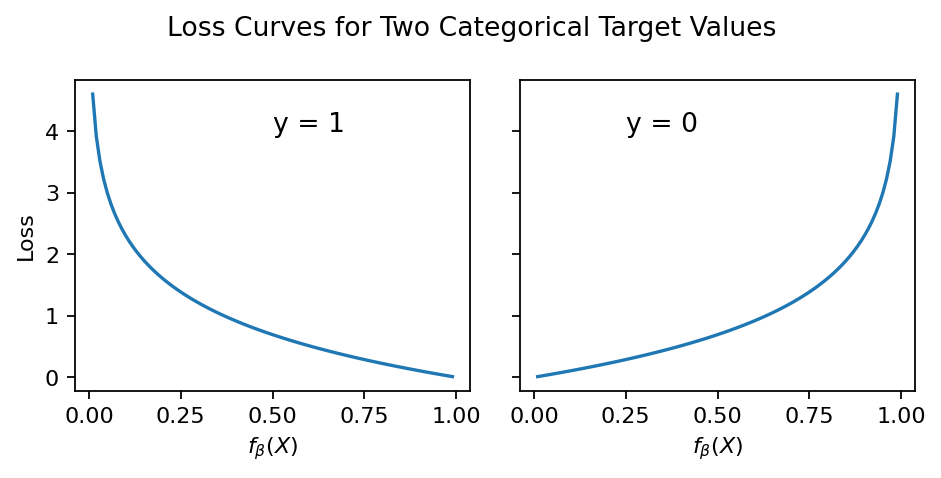

In [ ]:
# Set default plot resolution to 160 dpi
plt.rcParams['figure.dpi'] = 160

fig,ax = plt.subplots(1, 2, figsize=(6,3), sharey=True)
x = np.linspace(0.01,1-0.01,100)
ax[0].plot(x, -np.log(x))
ax[0].text(0.5, 4.0, "y = 1", fontsize=12)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel(r"$f_{\beta}(X)$")

ax[1].plot(x, -np.log(1-x))
ax[1].text(0.25, 4.0, "y = 0", fontsize=12)
ax[1].set_xlabel(r"$f_{\beta}(X)$")
plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
plt.tight_layout()
plt.show()

Figure on the left (when y=1):

- As $\widehat y$ approaches 0, the loss increases in size.
- When y=1 and the prediction, $\widehat y$, is close to 0, the loss is very large.
- When y=1 and $\widehat y$ is very close to 1, the loss is approximately zero.

Figure on the right (when y=0):

- As $\widehat y$ approaches 1, the loss increases in size.
- When y=0 and the prediction, $\widehat y$, is close to 1, the loss is very large.
- When y=0 and $\widehat y$ is very close to 0, the loss is approximately zero.



Combined, the curves are similar to the quadratic curve of the squared error cost function. Note, the x-axis is $f_{\mathbf{\beta}}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.
$$ $$
The loss function above can be rewritten to be easier to implement.
$$ $$
$$L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) \tag{Eq. 3.7} $$
$$ $$
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:
$$ $$ 
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$ $$
$$
\begin{align}
L(f_{\mathbf{\beta}}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$ $$
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$ $$
$$
\begin{align}
  L(f_{\mathbf{\beta}}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{\beta}}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
$$ $$


# Cost Function - Logistic Regression

Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.
$$ $$

Recall that for logistic regression, the cost function is of the form 
$$ $$

$$ J(\mathbf{\beta}) = \frac{1}{m} \sum_{i=1}^{m} \left[ L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) \right] \tag{Eq. 3.8}$$

where
* $L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)})$ is the cost for a single data point, which is:
$$ $$

$$L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) $$
$$ $$
    
*  where m is the number of training examples in the data set and:
$$ $$
$$
\begin{align}
  f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}) &= g(z^{(i)}) \\
  \\
  z^{(i)} &= \mathbf{X}^{(i,)} \cdot \mathbf{\beta} \\
  \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}
\end{align}
$$
 

In [ ]:
def compute_cost_logistic(X, y, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n+1)) : Data, m examples with n features + bias term
      y (ndarray (m,))    : target values
      b (ndarray (n+1,))  : model parameters
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    n = X.shape[1] # that this n actually equals n+1 (because it includes the bias term)
    loss = 0.0
    for i in range(m):
        z_i = 0.0
        for j in range(n):
            z_i += b[j]*X[i,j]
        f_b_i = sigmoid(z_i)
        loss += -y[i]*np.log(f_b_i) - (1-y[i])*np.log(1-f_b_i)
             
    cost = loss / m
    return cost

In [ ]:
# Data set
X_train = np.array([[0.5, 1.5],
                    [1.0, 1.0],
                    [1.5, 0.5],
                    [3.0, 0.5],
                    [2.0, 2.0],
                    [1.0, 2.5]])

y_train = np.array([0, 0, 0, 1, 1, 1])                                      

# Create a vector of 1's with length = # of training examples
x0 = np.ones(X_train.shape[0])

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, X_train))

# Print data
print(X_train)

[[1.  0.5 1.5]
 [1.  1.  1. ]
 [1.  1.5 0.5]
 [1.  3.  0.5]
 [1.  2.  2. ]
 [1.  1.  2.5]]


In [ ]:
# How many features (not including bias)?
print(X_train.shape[1]-1) # n = 2

# How many parameters will we have (including bias)?
print(X_train.shape[1]) # b0, b1, b2

# How many training examples?
print(X_train.shape[0]) # m = 6

2
3
6


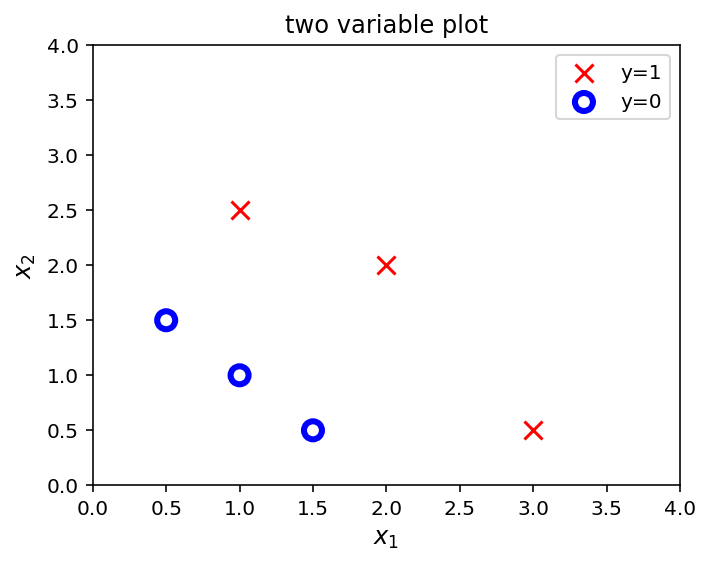

In [ ]:
# Set default plot resolution to 145 dpi
plt.rcParams['figure.dpi'] = 145

fig,ax = plt.subplots(1,1,figsize=(5,4))

def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label, zorder=3)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3, zorder=3)
    ax.legend(loc=loc)

#plot 2, two variables
plot_data(X_train[:,1:], y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_title('two variable plot')
ax.legend()
plt.tight_layout()
plt.show()

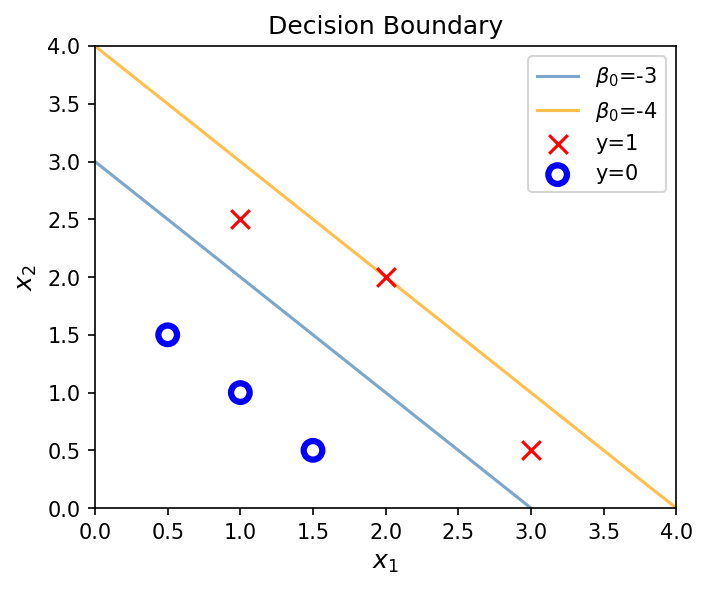

In [ ]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Choose values between 0 and 6
x1 = np.arange(0,6)

# Plot the two decision boundaries
x2 = 3 - x1
x2_other = 4 - x1

fig,ax = plt.subplots(1, 1, figsize=(5,4))
# Plot the decision boundary
ax.plot(x1,x2, c="steelblue", alpha=0.7, label=r"$\beta_0$=-3")
ax.plot(x1,x2_other, c="orange", alpha=0.7, label=r"$\beta_0$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train[:,1:],y_train,ax,)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_xlabel('$x_1$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [ ]:
# Set up 2 arrays of parameters (for example)
b_array1 = np.array([-3,1,1]) # b0, b1, b2
b_array2 = np.array([-4,1,1]) # b0, b1, b2

# Print the costs
print("Cost for b0 = -3 : ", compute_cost_logistic(X_train, y_train, b_array1))
print("Cost for b0 = -4 : ", compute_cost_logistic(X_train, y_train, b_array2))

Cost for b0 = -3 :  0.36686678640551745
Cost for b0 = -4 :  0.5036808636748461


In [ ]:
# Create cost function using vectorization:

def compute_cost_logistic_vec(X, y, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n+1)) : Data, m examples with n features + bias term
      y (ndarray (m,))    : target values
      b (ndarray (n+1,))  : model parameters
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    z = np.dot(X, b)
    f_wb = sigmoid(z)
    loss = -y*np.log(f_wb) - (1-y)*np.log(1-f_wb)

    cost = loss.sum() / m
    return cost

In [ ]:
# Show results are the same
print("Cost for b = -3 : ", compute_cost_logistic_vec(X_train, y_train, b_array1))
print("Cost for b = -4 : ", compute_cost_logistic_vec(X_train, y_train, b_array2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


# Gradient Descent - Logistic Regression

You will likely notice that the gradient descent algorithm for logistic regression looks very similar to the gradient descent algorithm used for multiple linear regression*.
$$ $$
Let's begin with the cost function for logistic regression:
$$ J(\mathbf{\beta}) = \frac{1}{m} \sum_{i=1}^{m} \left[ L(f_{\mathbf{\beta}}(\mathbf{X}^{(i,)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{\beta}}\left( \mathbf{X}^{(i,)} \right) \right) \right] \tag{Eq. 3.9}$$
$$ $$
Gradient descent for logistic regression has the following form:
$$ $$
$ Repeat $ $ \{ $
$$ $$
$$ \beta_0 := \beta_0 - \alpha \ \frac{\partial}{\partial \beta_0} J(\beta_0,\beta_1, ..., \beta_n)
\ $$
$$ $$
$$ \beta_1 := \beta_1 - \alpha \ \frac{\partial}{\partial \beta_1} J(\beta_0,\beta_1, ..., \beta_n) $$
$$ $$
$$ \vdots $$
$$ $$
$$ \beta_n := \beta_n - \alpha \ \frac{\partial}{\partial \beta_n} J(\beta_0,\beta_1, ..., \beta_n) \tag{Eq. 3.10} $$
$ \} $
$$ $$
And, we can write gradient descent more succinctly using vector notation:
$$ $$
$ Repeat $ $ \{ $
$$ $$
$$ \beta_j := \beta_j - \alpha \ \frac{\partial}{\partial \beta_j} J(\vec{\beta}) \tag{Eq. 3.11} $$
$ \} $
$$ $$

Finally, gradient descent with partial derivatives explicitly written for the bias parameter ($\beta_0$) and weight parameters ($\beta_1, ..., \beta_n$) is:
$$ $$
$ Repeat $ $ \{ $
$$ $$
\begin{align}
& \beta_0 := \beta_0 - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \\ 
\\
& \beta_1 := \beta_1 - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \ x_1^{(i)} \\
\\
& \ \ \ \ \ \vdots \\
\\
& \beta_n := \beta_n - \alpha \ \frac{1}{m} \sum\limits_{i = 1}^{m} (f_{\vec{\beta}}(x^{(i)}) - y^{(i)}) \  x_n^{(i)} \tag{Eq. 3.12}
\end{align}
$ \} $
$$ $$

- Notice that the *intercept* term is the only term *not* multiplied by an *x* term.
$$ $$

*NOTE: Although the gradient descent algorithm for logistic regression may look the same as the one for linear regression, they are NOT the same algorithm because the model, $f_{\vec{\beta}}(X)$, used to make predictions in logistic regression is defined as:
$$ $$
$$ f_{\vec{\beta}}(X) = \frac{1}{1+e^{-(X \cdot \beta)}} $$
$$ $$
Whereas $f_{\vec{\beta}}(X)$ in linear regression is defined as:
$$ $$
$$ f_{\vec{\beta}}(X) = X \cdot \beta $$
$$ $$

# Implementation of Gradient Descent in Python

Let's begin by creating a function for computing gradients:

In [ ]:
def compute_gradient_logistic(X, y, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n+1): Data, m examples with n features + bias (columns of all 1's)
      y (ndarray (m,)): target values

    Returns:
      dj_db (ndarray (n+1,)): The gradient of the cost w.r.t. the parameters b 
    """
    m,n = X.shape # in this case, n = n + 1 (i.e., includes bias parameter)
    dj_db = np.zeros((n,))                            

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],b))              
        err_i  = f_wb_i  - y[i]                      
        for j in range(n):
            dj_db[j] = dj_db[j] + err_i * X[i,j]      

    dj_db = dj_db/m                                 
        
    return dj_db  

Check the implementation:

In [ ]:
b_tmp = np.array([1.,2.,3.])
dj_db_tmp = compute_gradient_logistic(X_train, y_train, b_tmp)
print(f"dj_db: {dj_db_tmp.tolist()}" )

dj_db: [0.49861806546328574, 0.498333393278696, 0.49883942983996693]


Create a function to run gradient descent:

In [ ]:
def gradient_descent(X, y, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n+1)    : Data, m examples with n features + bias
      y (ndarray (m,))      : target values
      b_in (ndarray (n+1,)) : Initial values of model parameters  
      alpha (float)         : Learning rate
      num_iters (scalar)    : number of iterations to run gradient descent
      
    Returns:
      b (ndarray (n+1,))    : Updated values of parameters
    """
    # An array to store cost J and b's at each iteration primarily for graphing later
    J_history = []
    b = copy.deepcopy(b_in)  # avoid modifying global b within function
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db = compute_gradient_logistic(X, y, b)   

        # Update Parameters using w, b, alpha and gradient           
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return b, J_history         #return final b and J history for graphing


Now let's run gradient descent

In [ ]:
b_tmp  = np.zeros_like(X_train[1])
alph = 0.1
iters = 10000

b_final, _ = gradient_descent(X_train, y_train, b_tmp, alph, iters) 
print(f"\nupdated parameters: b:{b_final}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.15909776668704564   
Iteration 2000: Cost 0.08460064176930081   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.042907594216819965   
Iteration 5000: Cost 0.03433847729884561   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879302   
Iteration 8000: Cost 0.021423703325692916   
Iteration 9000: Cost 0.019030137124109076   

updated parameters: b:[-14.22241   5.28123   5.07816]


Visualize the results:

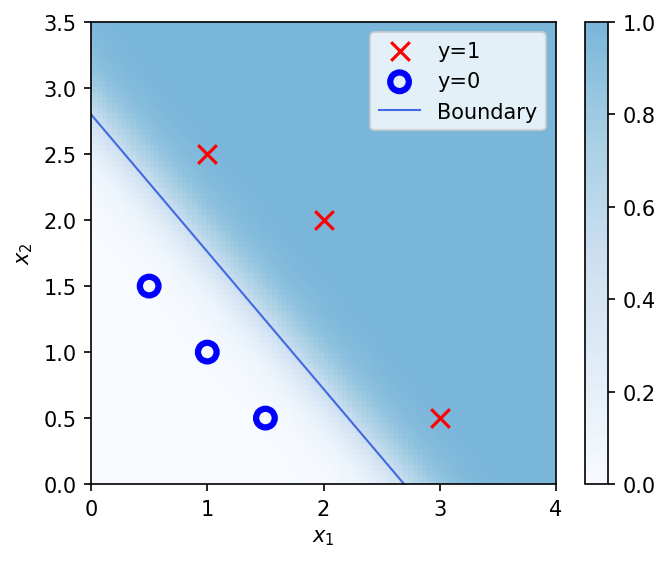

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_prob(ax, weights, bias):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x1_space  = np.linspace(0, 4 , 100)
    x2_space  = np.linspace(0, 4 , 100)

    # get probability for x0,x2 ranges
    tmp_x1,tmp_x2 = np.meshgrid(x1_space,x2_space)
    z = np.zeros_like(tmp_x1)
    for i in range(tmp_x1.shape[0]):
        for j in range(tmp_x2.shape[1]):
            z[i,j] = sigmoid(np.dot(weights, np.array([tmp_x1[i,j],tmp_x2[i,j]])) + bias)


    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(tmp_x1, tmp_x2, z,
                   norm=mpl.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

fig,ax = plt.subplots(1,1,figsize=(5,4))

# plot the probability 
plt_prob(ax, b_final[1:], b_final[0])

# Plot the original data
ax.set_ylabel(r'$x_2$')
ax.set_xlabel(r'$x_1$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train[:,1:],y_train,ax)

# Plot the decision boundary
x1 = -b_final[0]/b_final[1]
x2 = -b_final[0]/b_final[2]
ax.plot([0,x1],[x2,0], c="royalblue", lw=1, label = "Boundary")

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Univariate Logistic Regression Example

In [ ]:
# Example data: Univariate
x_train = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])

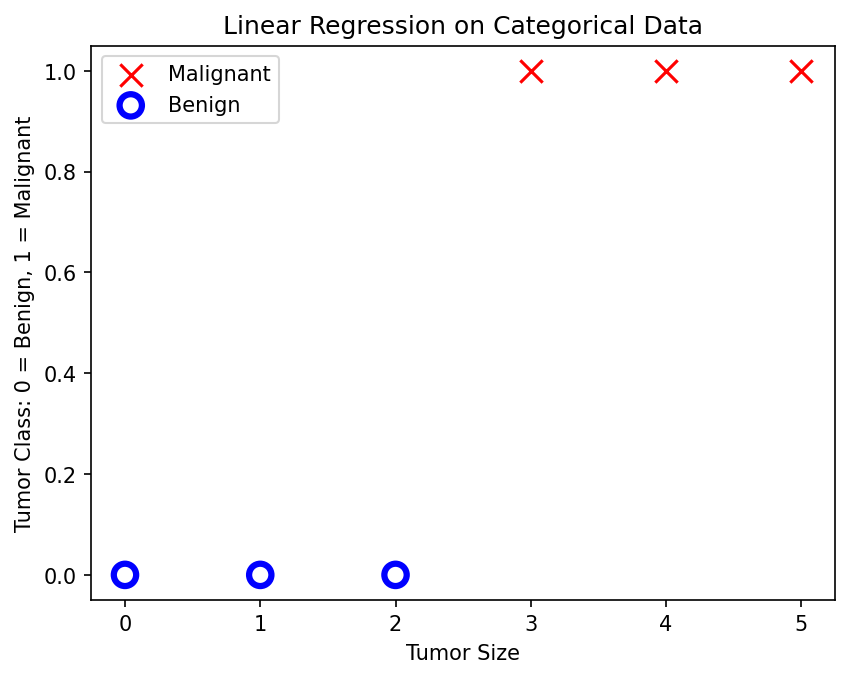

In [ ]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Create a vector of 1's with length = # of training examples
x0 = np.ones(x_train.shape[0])

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, x_train))

In [ ]:
print(x_train)

[0. 1. 2. 3. 4. 5.]


In [ ]:
print(X_train)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
b_in = np.zeros(X_train.shape[1])
print(b_in)

[0. 0.]


In [ ]:
alpha = 0.1
iterations = 12000

In [ ]:
b_final, J_hist = gradient_descent(X_train, y_train, b_in, alpha, iterations)

Iteration    0: Cost 0.6433158133057238   
Iteration 1200: Cost 0.10306097158341138   
Iteration 2400: Cost 0.07005721107591982   
Iteration 3600: Cost 0.05435535900930243   
Iteration 4800: Cost 0.04467437478652525   
Iteration 6000: Cost 0.03799053561526236   
Iteration 7200: Cost 0.03306351442738873   
Iteration 8400: Cost 0.029269220301014393   
Iteration 9600: Cost 0.026253001229554287   
Iteration 10800: Cost 0.02379622379534897   


In [ ]:
print(b_final)

[-13.39967   5.43487]


In [ ]:
y_pred = logistic_model_predict(X_train, b_final)
print(y_pred)

[0.      0.00035 0.07379 0.94809 0.99976 1.     ]


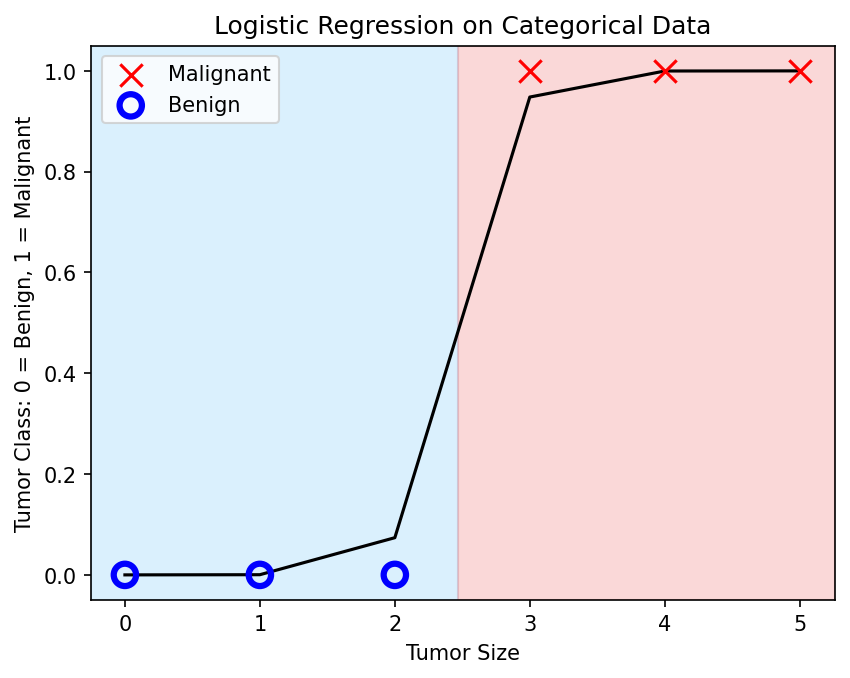

In [ ]:
# Identify Tumor Size where y-hat = 0.5
x_threshold = -b_final[0]/b_final[1]

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train == 1
neg = y_train == 0

# Plot the data points
plt.scatter(x_train[pos], y_train[pos], marker='x', s=115, c = 'red', label="Malignant", zorder = 3)
plt.scatter(x_train[neg], y_train[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue", lw=3, zorder = 3)

# Plot our model predictions
plt.plot(x_train, y_pred, c='black')

# Set the title
plt.title("Logistic Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=x_threshold, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=x_threshold, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Remove horizontal white space
plt.margins(x=0)

# Show the legend
plt.legend()

# Display the plot
plt.show()

# Data with large tumor size

In [ ]:
# Add one new data point w/ large tumor size:
x_train2 = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 26.0])
y_train2 = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])

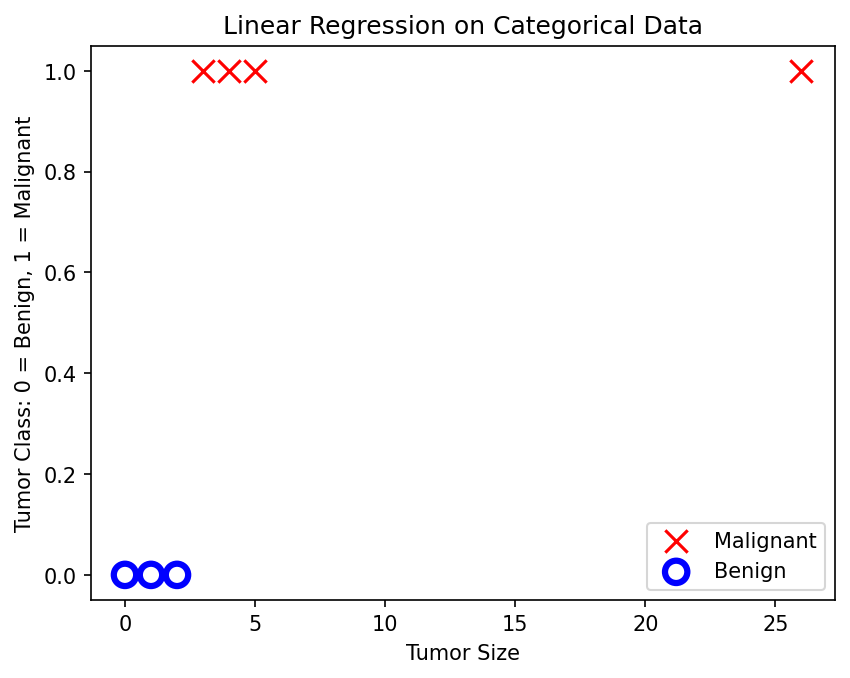

In [ ]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train2 == 1
neg = y_train2 == 0

# Plot the data points
plt.scatter(x_train2[pos], y_train2[pos], marker='x', s=115, c = 'red', label="Malignant")
plt.scatter(x_train2[neg], y_train2[neg], marker='o', s=115, label="Benign", facecolors='none', edgecolors="blue",lw=3)

# Set the title
plt.title("Linear Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Create a vector of 1's with length = # of training examples
x0_2 = np.ones(x_train2.shape[0])

# Use the function np.hstack to create a column of 1's in X_train
X_train2 = np.column_stack((x0_2, x_train2))

In [ ]:
b_in2 = np.zeros(X_train2.shape[1])

In [ ]:
alpha = 0.005
iterations = 10000

In [ ]:
b_final2, J_hist2 = gradient_descent(X_train2, y_train2, b_in2, alpha, iterations)

Iteration    0: Cost 0.6639095463243466   
Iteration 1000: Cost 0.3737043799434086   
Iteration 2000: Cost 0.30347546867292946   
Iteration 3000: Cost 0.25902703025569845   
Iteration 4000: Cost 0.22861205188979342   
Iteration 5000: Cost 0.20646061619378572   
Iteration 6000: Cost 0.1895344217441271   
Iteration 7000: Cost 0.17611231760696103   
Iteration 8000: Cost 0.165154620672058   
Iteration 9000: Cost 0.1559984523291769   


In [ ]:
print(b_final2)

[-3.47149  1.54576]


In [ ]:
y_pred2 = logistic_model_predict(X_train2, b_final2)
print(y_pred2)

[0.03013 0.12722 0.40613 0.76238 0.9377  0.98604 1.     ]


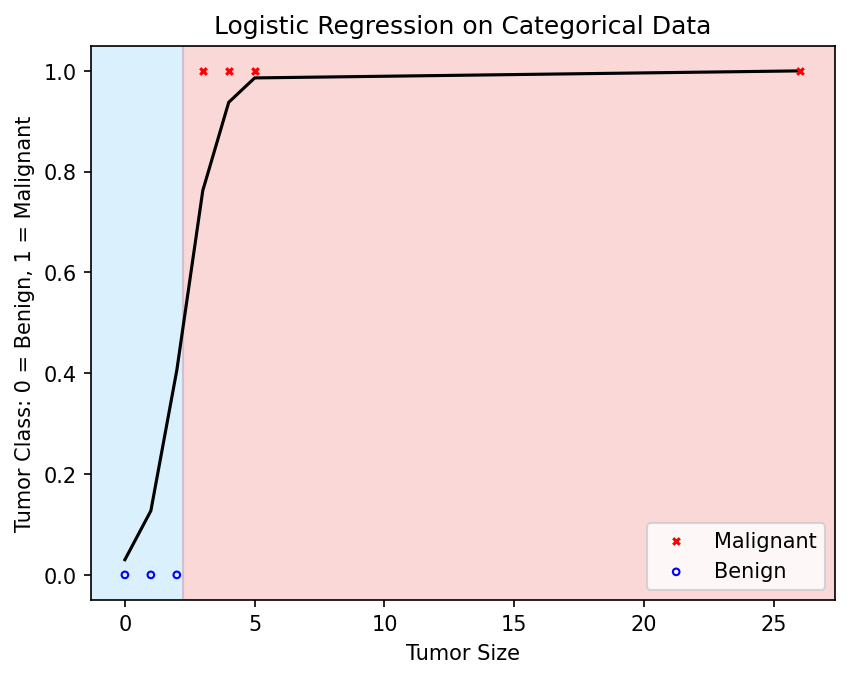

In [ ]:
# Identify Tumor Size where y-hat = 0.5
x_threshold2 = -b_final2[0]/b_final2[1]

# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Create two boolean arrays (pos and neg) based on the values of y_train
pos = y_train2 == 1
neg = y_train2 == 0

# Plot the data points
plt.scatter(x_train2[pos], y_train2[pos], marker='x', s=10, c = 'red', label="Malignant", zorder = 3)
plt.scatter(x_train2[neg], y_train2[neg], marker='o', s=10, label="Benign", facecolors='none', edgecolors="blue", lw=1, zorder = 3)

# Plot our model predictions
plt.plot(x_train2, y_pred2, c='black')

# Set the title
plt.title("Logistic Regression on Categorical Data")

# Set the y-axis label
plt.ylabel('Tumor Class: 0 = Benign, 1 = Malignant')

# Set the x-axis label
plt.xlabel('Tumor Size')

# Get current axes and assign to ax (plotting object)
ax = plt.gca()

# Shade the background to the left of x_threshold with light blue and to the right with light red
ax.axvspan(xmin=ax.get_xlim()[0], xmax=x_threshold2, alpha=0.3, color='lightskyblue')
ax.axvspan(xmin=x_threshold2, xmax=ax.get_xlim()[1], alpha=0.3, color='lightcoral')

# Remove horizontal white space
plt.margins(x=0)

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
X_threshold = np.array([1, x_threshold2])
logistic_model_predict(X_threshold, b_final2)

0.5

# Larger Data set


In [ ]:
# Define the dataset
dataset = np.array([[1.0,  1.2,  0.7, 0],
                    [1.0,  2.5,  1.3, 0],
                    [1.0,  1.8,  0.8, 0],
                    [1.0,  2.2,  1.4, 0],
                    [1.0,  3.5,  1.2, 0],
                    [1.0,  2.9,  2.3, 0],
                    [1.0,  3.7,  2.1, 0],
                    [1.0,  4.0,  3.2, 0],
                    [1.0,  4.5,  2.8, 1],
                    [1.0,  5.0,  3.1, 1],
                    [1.0,  5.5,  2.3, 1],
                    [1.0,  6.0,  2.9, 1],
                    [1.0,  6.5,  3.4, 1],
                    [1.0,  7.0,  3.6, 1],
                    [1.0,  7.5,  4.2, 1],
                    [1.0,  8.0,  3.9, 1],
                    [1.0,  8.5,  4.5, 1],
                    [1.0,  9.0,  4.2, 1],
                    [1.0,  9.5,  4.8, 1],
                    [1.0, 10.0,  5.0, 1]])

# Split the dataset into features and labels
X_train3 = dataset[:, :-1]
y_train3 = dataset[:, -1]

# Initialize weights
b_in3 = np.zeros(X_train3.shape[1])

In [ ]:
alpha = 0.01
iterations = 10000

In [ ]:
b_final3, J_hist3 = gradient_descent(X_train3, y_train3, b_in3, alpha, iterations)

Iteration    0: Cost 0.6621322246639821   
Iteration 1000: Cost 0.3754256970620363   
Iteration 2000: Cost 0.29502185974047634   
Iteration 3000: Cost 0.24974363651176962   
Iteration 4000: Cost 0.2207544306910718   
Iteration 5000: Cost 0.20043121683517126   
Iteration 6000: Cost 0.18524191651779884   
Iteration 7000: Cost 0.17335188405266663   
Iteration 8000: Cost 0.16371798197521653   
Iteration 9000: Cost 0.15570313947197162   


In [ ]:
y_pred3 = logistic_model_predict(X_train3, b_final3)
print(y_pred3)

[0.02439 0.11859 0.05621 0.07466 0.39613 0.12915 0.35909 0.33473 0.57095
 0.7104  0.88857 0.92643 0.95441 0.97598 0.98465 0.99383 0.99609 0.99844
 0.99901 0.99949]


In [ ]:
# Classifies predictions greater than or equal to 0.5 as 1, otherwise 0.
def round_array(x):
    return np.round(x).astype(int)

In [ ]:
class_pred = round_array(y_pred3)

In [ ]:
class_pred - y_train3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])